# KNN no `chb23_com_dwt`

Explorando 20 rodadas de classificação com `KNN` em sua configuração padrão com o dataframe extraído com DWT para encontrar canal com melhor desempenho.

Por fim salvando a tabela com médias, desvios padrão e medianas do desempenho de cada canal.

## Importando bibliotecas

In [1]:
import numpy as np
import pandas as pd

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

seed_array = np.load('./../20_seeds.npy')
print(f'seeds: {seed_array}')

seeds: [4382 8968 8442 1729  290  490 2128 1167 8900 5078 1359  894 7809 6990
 3623 5906 1687 7080 5473 7854]


## 20 rodadas

In [2]:
chb_DF = pd.read_csv('./chb23_com_dwt.csv')
target_S = chb_DF.pop('target')

accuracy_DF = pd.DataFrame()

# agrupa todas colunas pelo mesmo número do canal
colunas_agrupadas_por_numero = []
for i in range(18):
    colunas_agrupadas_por_numero.append(
        [column for column in chb_DF.columns if f'{i}' in column.split('-')]
    )

for numero_da_coluna, colunas in enumerate(colunas_agrupadas_por_numero):
    X, y = chb_DF[colunas].values, target_S.values

    acc = []   

    for seed in seed_array:
        # Distribuindo os dados
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)
        
        # Instanciando e treinando classificador
        model = KNeighborsClassifier().fit(X_train, y_train)

        # Adicionando resultados às respectivas listas
        acc.append(model.score(X_test, y_test))

    accuracy_DF[f'{numero_da_coluna}'] = acc

accuracy_DF

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.808,0.968,0.984,0.976,0.800,0.912,0.912,0.944,0.712,0.848,0.856,0.840,0.752,0.816,0.888,0.880,0.872,0.824
1,0.824,0.936,0.992,0.992,0.808,0.952,0.904,0.928,0.680,0.856,0.888,0.872,0.744,0.816,0.904,0.896,0.888,0.768
2,0.744,0.904,0.992,0.992,0.768,0.904,0.912,0.920,0.632,0.768,0.848,0.808,0.752,0.784,0.888,0.872,0.864,0.800
3,0.808,0.944,0.976,0.992,0.832,0.960,0.928,0.928,0.688,0.808,0.856,0.824,0.704,0.856,0.904,0.872,0.904,0.816
4,0.736,0.896,0.976,0.992,0.784,0.936,0.920,0.920,0.712,0.840,0.840,0.840,0.752,0.776,0.872,0.888,0.888,0.808
5,0.784,0.952,0.992,1.000,0.856,0.952,0.944,0.968,0.688,0.832,0.840,0.808,0.696,0.840,0.920,0.896,0.872,0.824
6,0.736,0.968,0.976,1.000,0.768,0.928,0.912,0.952,0.704,0.800,0.856,0.840,0.704,0.808,0.848,0.904,0.840,0.832
7,0.792,0.896,0.984,0.992,0.832,0.944,0.928,0.952,0.712,0.848,0.888,0.792,0.720,0.816,0.912,0.880,0.872,0.840
8,0.784,0.936,0.976,0.992,0.800,0.936,0.944,0.944,0.664,0.840,0.896,0.856,0.704,0.848,0.896,0.888,0.880,0.832
9,0.792,0.920,0.992,1.000,0.808,0.928,0.936,0.920,0.704,0.800,0.856,0.800,0.704,0.800,0.888,0.856,0.872,0.832


,count,mean,std,min,25%,50%,75%,max
3,20.0,0.9924,0.006073,0.976,0.992,0.992,0.994,1.000
2,20.0,0.9828,0.009457,0.960,0.976,0.984,0.992,1.000
7,20.0,0.9464,0.018187,0.920,0.934,0.948,0.960,0.976
5,20.0,0.9396,0.014091,0.904,0.934,0.944,0.952,0.960
1,20.0,0.9304,0.023374,0.888,0.918,0.936,0.944,0.968
6,20.0,0.9260,0.013456,0.896,0.918,0.928,0.936,0.944
14,20.0,0.8916,0.021789,0.848,0.872,0.892,0.906,0.936
15,20.0,0.8812,0.016876,0.848,0.872,0.884,0.890,0.904
16,20.0,0.8680,0.025760,0.816,0.860,0.872,0.888,0.904
10,20.0,0.8468,0.029625,0.792,0.840,0.852,0.856,0.896


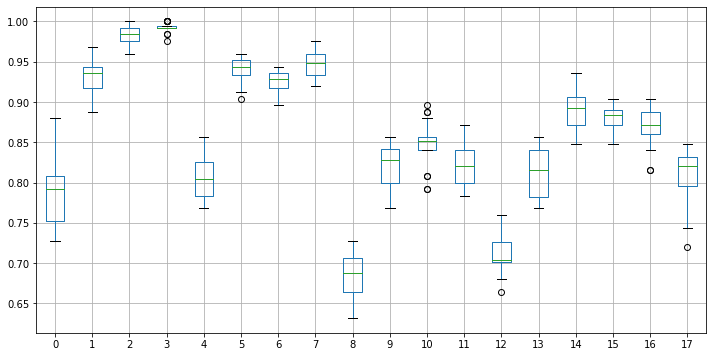

In [3]:
accuracy_DF.boxplot(figsize=(12, 6))
accuracy_DF.describe().transpose().sort_values(by='mean', ascending=False)

## Salvando rank em arquivo csv

In [4]:
save_DF = accuracy_DF.describe().transpose()[['mean', 'std', '50%']]
save_DF['chb'] = '23'
save_DF['channel'] = save_DF.index

save_DF.to_csv(path_or_buf='./knn_descr_channel_rank.csv', index=False)
save_DF

,mean,std,50%,chb,channel
0,0.7872,0.038446,0.792,23,0
1,0.9304,0.023374,0.936,23,1
2,0.9828,0.009457,0.984,23,2
3,0.9924,0.006073,0.992,23,3
4,0.8052,0.026120,0.804,23,4
5,0.9396,0.014091,0.944,23,5
6,0.9260,0.013456,0.928,23,6
7,0.9464,0.018187,0.948,23,7
8,0.6864,0.027048,0.688,23,8
9,0.8200,0.028727,0.828,23,9
